In [ ]:
# —Ä–∞—Å—Å–∫–æ–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ –∫–æ–¥ –Ω–∏–∂–µ, —á—Ç–æ–±—ã —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –≤—Å–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
# !pip install -q \
#     pyarrow==12.0.1 \
#     polars==0.18.6 \
#     pandas==2.0.3 \
#     scipy==1.10.1 \
#     numpy==1.24.3 \
#     torch==2.0.1

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import polars as pl
import scipy.sparse as sp

import time
from typing import List
import matplotlib.pyplot as plt

Pytorch ‚Äì —Ñ—Ä–µ–π–º–≤–æ—Ä–∫ –≥–ª—É–±–æ–∫–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –ø–æ–∑–≤–æ–ª—è—é—â–∏–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å autograd (–∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–π –ø–æ–¥—Å—á–µ—Ç –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ —Å –ø–æ–º–æ—â—å—é –æ–±—Ä–∞—Ç–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è –æ—à–∏–±–∫–∏) –¥–ª—è –ø—Ä–æ—Å—Ç–æ–≥–æ –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–≥–æ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥–ª—É–±–æ–∫–∏—Ö –º–æ–¥–µ–ª–µ–π

–†–∞–±–æ—Ç–∞ —Å –¥–∞–Ω–Ω—ã–º–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∞ –≤ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –ø–æ—Ö–æ–∂–µ–º –Ω–∞ numpy array —Å—Ç–∏–ª–µ, –∞ –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π –º–æ–∂–Ω–æ –ª–µ–≥–∫–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å gpu —Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è–º–∏ –≤ –∫–æ–¥–µ

In [2]:
x_numpy = np.array([1, 2, 3])
print(x_numpy)

[1 2 3]


In [3]:
x_torch = torch.from_numpy(x_numpy)
print(x_torch)

tensor([1, 2, 3])


In [4]:
x_torch.requires_grad

False

In [5]:
x_torch = x_torch.float()
x_torch.requires_grad = True
x_torch.requires_grad

True

–î–∞–≤–∞–π—Ç–µ –∑–∞–¥–∞–¥–∏–º –ø—Ä–æ—Å—Ç—É—é —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä—É—é –º—ã —Ö–æ—Ç–∏–º –ø—Ä–∏–±–ª–∏–∑–∏—Ç—å —Å –ø–æ–º–æ—â—å—é –≥–ª—É–±–æ–∫–æ–π –º–æ–¥–µ–ª–∏:

$f(x) = 3 \cdot \cos(x^2 + \sqrt{|x|}) + 5 + x^3 + \epsilon$, –≥–¥–µ $\epsilon$ ‚Äì —Å–ª—É—á–∞–π–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞ (—à—É–º) –∏–∑ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

In [6]:
def f(x):
    return 3 * torch.cos(x**2 + torch.sqrt(torch.abs(x))) + 5 + x**3 + torch.randn_like(x)

x_all = torch.from_numpy(np.random.uniform(-10, 10, size=1_000)).float()
x_all = torch.sort(x_all)[0]

x_train = x_all[:900]
y_train = f(x_train)

x_test = x_all[900:]
y_test = f(x_test)

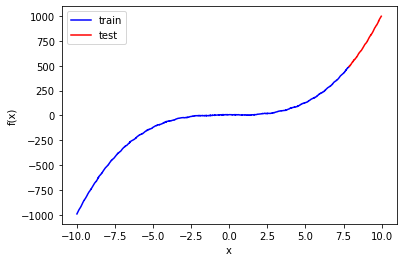

In [7]:
plt.plot(x_train, y_train, c='b', label='train')
plt.plot(x_test, y_test, c='r', label='test')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show();

## –û–±—É—á–∏–º –ø—Ä–æ—Å—Ç—É—é –º–æ–¥–µ–ª—å

`nn.Module` ‚Äì –±–∞–∑–æ–≤—ã–π –∫–ª–∞—Å—Å –¥–ª—è –∏–º–ø–ª–µ–º–µ–Ω—Ç–∞—Ü–∏–∏ –≥–ª—É–±–æ–∫–∏—Ö –º–æ–¥–µ–ª–µ–π

`torch.optim.*` ‚Äì —Ä–∞–∑–ª–∏—á–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤, –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Adam –∫–∞–∫ –Ω–∞–∏–±–æ–ª–µ–µ —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π

`nn.MSELoss` ‚Äì —Ñ—É–Ω–∫—Ü–∏—è –æ—à–∏–±–∫–∏ MSE (–º–æ–∂–Ω–æ –¥–µ–ª–∞—Ç—å –∏ —Å–≤–æ–∏ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ —Å–æ—Å—Ç–æ—è—Ç –∏–∑ —Ñ—É–Ω–∫—Ü–∏–π pytorch)

`nn.Linear` ‚Äì –ª–∏–Ω–µ–π–Ω—ã–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π  (–º–∞—Ç—Ä–∏—Ü–∞ n x m –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä –≥–ª–æ–±–∞–ª—å–Ω–æ–≥–æ —Å–º–µ—â–µ–Ω–∏—è)

`nn.ReLU` ‚Äì —Ñ—É–Ω–∫—Ü–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ `relu(x) = min(0, x)`

In [11]:
class PredictionModel(nn.Module):
    def __init__(
        self,
        n_blocks: int = 3,
        hidden_dim: int = 64,
        input_dim: int = 1,
        output_dim: int = 1,
    ):
        # –≤–∞–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, —á—Ç–æ–±—ã —Å–ª–æ–∏ —É—á–∏—Ç—ã–≤–∞–ª–∏—Å—å –ø—Ä–∏ –æ–±—Ä–∞—Ç–Ω–æ–º —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–∏ –æ—à–∏–±–æ–∫
        super().__init__()

        # –Ω–∞—à–∞ —Å–µ—Ç—å –±—É–¥–µ—Ç —Å–æ—Å—Ç–æ—è—Ç—å –∏–∑ —Å–∫—Ä—ã—Ç—ã—Ö –±–ª–æ–∫–æ–≤ –≤–∏–¥–∞ [Liner, ReLU], –∞ —Ç–∞–∫–∂–µ –≤—Ö–æ–¥–Ω–æ–π –∏ –≤—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π
        layers = []
        layers.extend(
            [
                nn.Linear(input_dim, hidden_dim),
                nn.ReLU(),
            ]
        )
        for _ in range(n_blocks):
            layers.extend([nn.Linear(hidden_dim, hidden_dim), nn.ReLU()])
        layers.extend([nn.Linear(hidden_dim, output_dim)])
        self.ff_layers = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.ff_layers(x)
        return x

In [12]:
%%time

model = PredictionModel()
# –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—É –ø–µ—Ä–µ–¥–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
# –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—à–∏–±–∫–∏ –∏—Å–ø–æ–ª—å–∑—É–µ–º MSE, —Ç–∞–∫ –∫–∞–∫ —Ä–µ—à–∞–µ–º –∑–∞–¥–∞—á—É —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
criterion = nn.MSELoss()

n_epochs = 1000

for epoch in range(n_epochs):
    # –≤–∫–ª—é—á–∏–º —Ä–µ–∂–∏–º –æ–±—É—á–µ–Ω–∏—è
    model.train()
    
    # –æ–±–Ω—É–ª–∏–º –≤—Å–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã, —á—Ç–æ–±—ã –¥–µ–ª–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ —Ç–æ–ª—å–∫–æ –ø–æ —Ç–µ–∫—É—â–∏–º –¥–∞–Ω–Ω—ã–º
    optimizer.zero_grad()
    
    y_preds = model(x_train.unsqueeze(-1))
    train_loss = criterion(y_preds, y_train.unsqueeze(-1))
    
    # —Å–¥–µ–ª–∞–µ–º –æ–±—Ä–∞—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏
    train_loss.backward()
    # –∏ —à–∞–≥ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ —Å –ø–æ–º–æ—â—å—é –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞
    optimizer.step()
    
    # –≤–∫–ª—é—á–∏–º —Ä–µ–∂–∏–º –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞
    model.eval()
    
    # —Ä–µ–∂–∏–º no_grad –æ—Ç–∫–ª—é—á–∞–µ—Ç –ø–æ–¥—Å—á–µ—Ç –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
    with torch.no_grad():
        y_preds = model(x_test.unsqueeze(-1)).squeeze(-1)
    
    test_loss = criterion(y_preds, y_test)
    
    print(f'[{epoch + 1}/{n_epochs} epoch] Train loss = {train_loss:.2f}, Test loss = {test_loss:.2f}')

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[1/1000 epoch] Train loss = 85791.23, Test loss = 533198.25
[2/1000 epoch] Train loss = 85433.70, Test loss = 532538.88
[3/1000 epoch] Train loss = 84584.05, Test loss = 530607.19
[4/1000 epoch] Train loss = 82974.66, Test loss = 526928.38
[5/1000 epoch] Train loss = 80228.62, Test loss = 520828.19
[6/1000 epoch] Train loss = 75633.62, Test loss = 511005.28
[7/1000 epoch] Train loss = 68813.60, Test loss = 495649.44
[8/1000 epoch] Train loss = 59352.85, Test loss = 472578.56
[9/1000 epoch] Train loss = 47466.30, Test loss = 439558.88
[10/1000 epoch] Train loss = 34255.11, Test loss = 395040.53
[11/1000 epoch] Train loss = 23050.66, Test loss = 335411.69
[12/1000 epoch] Train loss = 21429.09, Test loss = 260027.95
[13/1000 epoch] Train loss = 28325.75, Test loss = 175556.98
[14/1000 epoch] Train loss = 24252.52, Test loss = 97453.32
[15/1000 epoch] Train loss = 17306.88, Test loss = 60079.73
[16/1000 epoch] Train loss = 20121.11, Test loss = 64863.62
[17/1000 epoch] Train loss = 23474.8

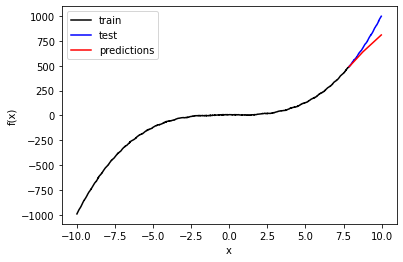

In [13]:
model.eval()

test_ordered_inds = torch.argsort(x_test)
with torch.no_grad():
    y_preds = model(x_test.unsqueeze(-1)).squeeze(-1)

plt.plot(x_train, y_train, c='black', label='train')
plt.plot(x_test, y_test, c='b', label='test')
plt.plot(x_test, y_preds, c='r', label='predictions')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show();

–ö–∞–∫ —Ç–µ–ø–µ—Ä—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å gpu (–∏ –Ω–µ —Ç–æ–ª—å–∫–æ) –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è –æ–±—É—á–µ–Ω–∏—è?

–î–ª—è —ç—Ç–æ–≥–æ –Ω—É–∂–Ω–æ –¥–≤–µ –≤–µ—â–∏:
- –ø–µ—Ä–µ–Ω–µ—Å—Ç–∏ –º–æ–¥–µ–ª—å –Ω–∞ –¥–µ–≤–∞–π—Å `model.to(device)`
- –ø–µ—Ä–µ–Ω–µ—Å—Ç–∏ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –¥–µ–≤–∞–π—Å `data.to(device)`

–ø–æ–ø—Ä–æ–±—É–µ–º —ç—Ç–æ –ø—Ä–∏–º–µ–Ω–∏—Ç—å

In [14]:
device = torch.device('cpu')
if torch.cuda.is_available():
    # –µ—Å–ª–∏ –µ—Å—Ç—å gpu —Å –ø–æ–¥–¥–µ—Ä–∂–∫–æ–π cuda
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    # –µ—Å–ª–∏ —É –≤–∞—Å mac –Ω–∞ apple silicon —á–∏–ø–µ, —Ç–æ —Ç–æ–∂–µ –º–æ–∂–Ω–æ —É—Å–∫–æ—Ä–∏—Ç—å
    device = torch.device('mps')
print(f'using {device} device')

using cpu device


In [12]:
%%time

model = PredictionModel().to(device)

# –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—É –ø–µ—Ä–µ–¥–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
# –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—à–∏–±–∫–∏ –∏—Å–ø–æ–ª—å–∑—É–µ–º MSE, —Ç–∞–∫ –∫–∞–∫ —Ä–µ—à–∞–µ–º –∑–∞–¥–∞—á—É —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
criterion = nn.MSELoss()

x_train_device = x_train.unsqueeze(-1).to(device)
x_test_device = x_test.unsqueeze(-1).to(device)

n_epochs = 1000

for epoch in range(n_epochs):
    # –≤–∫–ª—é—á–∏–º —Ä–µ–∂–∏–º –æ–±—É—á–µ–Ω–∏—è
    model.train()
    
    # –æ–±–Ω—É–ª–∏–º –≤—Å–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã, —á—Ç–æ–±—ã –¥–µ–ª–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ —Ç–æ–ª—å–∫–æ –ø–æ —Ç–µ–∫—É—â–∏–º –¥–∞–Ω–Ω—ã–º
    optimizer.zero_grad()
    
    y_preds = model(x_train_device).cpu()
    train_loss = criterion(y_preds, y_train.unsqueeze(-1))
    
    # —Å–¥–µ–ª–∞–µ–º –æ–±—Ä–∞—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏
    train_loss.backward()
    # –∏ —à–∞–≥ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ —Å –ø–æ–º–æ—â—å—é –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞
    optimizer.step()
    
    # –≤–∫–ª—é—á–∏–º —Ä–µ–∂–∏–º –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞
    model.eval()
    
    # —Ä–µ–∂–∏–º no_grad –æ—Ç–∫–ª—é—á–∞–µ—Ç –ø–æ–¥—Å—á–µ—Ç –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
    with torch.no_grad():
        y_preds = model(x_test_device).squeeze(-1).cpu()
    
    test_loss = criterion(y_preds, y_test)
    
    print(f'[{epoch + 1}/{n_epochs} epoch] Train loss = {train_loss:.2f}, Test loss = {test_loss:.2f}')

[1/1000 epoch] Train loss = 108655.42, Test loss = 601252.69
[2/1000 epoch] Train loss = 108430.91, Test loss = 598418.50
[3/1000 epoch] Train loss = 107952.32, Test loss = 592693.50
[4/1000 epoch] Train loss = 107019.78, Test loss = 582315.62
[5/1000 epoch] Train loss = 105377.23, Test loss = 564409.38
[6/1000 epoch] Train loss = 102668.73, Test loss = 535655.38
[7/1000 epoch] Train loss = 98501.35, Test loss = 492204.59
[8/1000 epoch] Train loss = 92311.41, Test loss = 430423.62
[9/1000 epoch] Train loss = 83832.25, Test loss = 347260.28
[10/1000 epoch] Train loss = 73067.98, Test loss = 243929.16
[11/1000 epoch] Train loss = 60498.81, Test loss = 129808.48
[12/1000 epoch] Train loss = 48704.29, Test loss = 53712.52
[13/1000 epoch] Train loss = 39863.91, Test loss = 46965.36
[14/1000 epoch] Train loss = 29037.39, Test loss = 76163.04
[15/1000 epoch] Train loss = 19917.18, Test loss = 141662.95
[16/1000 epoch] Train loss = 22505.50, Test loss = 224815.41
[17/1000 epoch] Train loss = 3

–ò—Å–ø–æ–ª—å–∑—É—è mps –ø–æ–ª—É—á–∏–ª–æ—Å—å –µ—â–µ –¥–æ–ª—å—à–µ, –∫–∞–∫ –¥—É–º–∞–µ—Ç–µ, –ø–æ—á–µ–º—É?

## –ü–æ–ø—Ä–æ–±—É–µ–º —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å SLIM

**–í–∞–∂–Ω–æ**: —ç—Ç–æ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–º –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º, —Ç–∞–∫ –∫–∞–∫ –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –æ–ø—Ä–µ–¥–µ–ª–Ω–Ω–æ—Å—Ç—å –º–∞—Ç—Ä–∏—Ü—ã –≤–µ—Å–æ–≤

In [15]:
# —Ä–∞—Å–∫–æ–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç—Ä–æ—á–∫–∏, —á—Ç–æ–±—ã –∑–∞–≥—Ä—É–∑–∏—Ç—å –¥–∞—Ç–∞—Å–µ—Ç
# !wget -q https://files.grouplens.org/datasets/movielens/ml-1m.zip
# !unzip -q ml-1m.zip

In [16]:
ratings = pd.read_csv(
    'ml-1m/ratings.dat', delimiter='::', header=None, 
    names=['user_id', 'item_id', 'rating', 'timestamp'], 
    engine='python'
)
ratings = pl.from_pandas(ratings).filter(pl.col('rating') >= 4)
ratings

shape: (575_281, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ user_id ‚îÜ item_id ‚îÜ rating ‚îÜ timestamp ‚îÇ
‚îÇ ---     ‚îÜ ---     ‚îÜ ---    ‚îÜ ---       ‚îÇ
‚îÇ i64     ‚îÜ i64     ‚îÜ i64    ‚îÜ i64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1       ‚îÜ 1193    ‚îÜ 5      ‚îÜ 978300760 ‚îÇ
‚îÇ 1       ‚îÜ 3408    ‚îÜ 4      ‚îÜ 978300275 ‚îÇ
‚îÇ 1       ‚îÜ 2355    ‚îÜ 5      ‚îÜ 978824291 ‚îÇ
‚îÇ 1       ‚îÜ 1287    ‚îÜ 5      ‚îÜ 978302039 ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶       ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 6040    ‚îÜ 1094    ‚îÜ 5      ‚îÜ 956704887 ‚îÇ
‚îÇ 6040    ‚îÜ 562     ‚îÜ 5      ‚îÜ 956704746 ‚îÇ
‚îÇ 6040    ‚îÜ 1096    ‚îÜ 4      ‚îÜ 956715648 ‚îÇ
‚îÇ 6040    ‚îÜ 1097    ‚îÜ 4      ‚îÜ 956715569 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [17]:
grouped_df = (
    ratings
    .groupby('user_id')
    .agg([
        pl.col('item_id').apply(lambda x: x[:-3]).alias('train_item_ids'),
        pl.col('rating').apply(lambda x: x[:-3]).alias('train_ratings'),
        pl.col('item_id').apply(lambda x: x[-3:]).alias('test_item_ids'),
        pl.col('rating').apply(lambda x: x[-3:]).alias('test_ratings'),
    ])
)
grouped_df

shape: (6_038, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ user_id ‚îÜ train_item_ids       ‚îÜ train_ratings ‚îÜ test_item_ids      ‚îÜ test_ratings ‚îÇ
‚îÇ ---     ‚îÜ ---                  ‚îÜ ---           ‚îÜ ---                ‚îÜ ---          ‚îÇ
‚îÇ i64     ‚îÜ list[i64]            ‚îÜ list[i64]     ‚îÜ list[i64]          ‚îÜ list[i64]    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 398     ‚îÜ [1175, 1249, ‚Ä¶ 1097] ‚îÜ [5, 5, ‚Ä¶ 4]   ‚îÜ [1240, 2116, 1171] ‚îÜ [4, 5, 4]    ‚îÇ
‚îÇ 4884    ‚îÜ [2054, 2058, ‚Ä¶ 1090] ‚îÜ [4, 4, ‚Ä¶ 5]   ‚îÜ [1092, 1094, 1097] ‚îÜ [4, 4, 5]    ‚îÇ
‚îÇ 130     ‚îÜ [1249, 2989, ‚Ä¶ 1240] ‚îÜ [4, 5, ‚Ä¶ 5]   ‚îÜ [3928, 1242, 2985] ‚îÜ [4, 5, 4]    ‚îÇ
‚îÇ 5464    ‚îÜ [593, 2075, ‚Ä¶ 2791]  ‚îÜ [5, 4, ‚Ä¶ 4]   ‚îÜ [527, 541, 2020]   ‚îÜ [4, 5, 4]    ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶                    ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶                  ‚îÜ ‚Ä¶            ‚îÇ
‚îÇ 707     ‚îÜ [3793, 3798, ‚Ä¶ 1214] ‚îÜ [4, 4, ‚Ä¶ 5]   ‚îÜ [3916, 1097, 1240] ‚îÜ [4, 4, 5]    ‚îÇ
‚îÇ 5621    ‚îÜ [574, 1405, ‚Ä¶ 1089]  ‚îÜ [5, 4, ‚Ä¶ 5]   ‚îÜ [1090, 1092, 1099] ‚îÜ [4, 4, 4]    ‚îÇ
‚îÇ 1473    ‚îÜ [587, 589, ‚Ä¶ 2019]   ‚îÜ [4, 5, ‚Ä¶ 4]   ‚îÜ [2028, 555, 1240]  ‚îÜ [4, 4, 4]    ‚îÇ
‚îÇ 2257    ‚îÜ [1265, 597, ‚Ä¶ 356]   ‚îÜ [4, 4, ‚Ä¶ 5]   ‚îÜ [3578, 3594, 3753] ‚îÜ [4, 4, 5]    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [18]:
median_seq_len = int(grouped_df['train_item_ids'].apply(len).median())
print(f"—Å—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–µ—Å—Å–∏–∏ {median_seq_len}")

—Å—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–µ—Å—Å–∏–∏ 55


In [19]:
TOP_K = 10


def user_intersection(y_relevant: List[str], y_recs: List[str], k: int = TOP_K) -> int:
    return len(set(y_relevant).intersection(y_recs[:k]))


def user_hitrate(y_relevant: List[str], y_recs: List[str], k: int = TOP_K) -> int:
    return int(user_intersection(y_relevant, y_recs, k) > 0)

In [20]:
# —Å–æ–±–µ—Ä–µ–º —Å—Ç—Ä–æ—á–∫–∏ –¥–ª—è —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
rows = []
cols = []
values = []

for user_id, train_item_ids, train_ratings in grouped_df.select(
    'user_id', 'train_item_ids', 'train_ratings'
).rows():
    rows.extend([user_id] * len(train_item_ids))
    cols.extend(train_item_ids)
    values.extend(train_ratings)

user_item_data = sp.csr_matrix((values, (rows, cols)), dtype=np.float32)
user_item_data

<6041x3953 sparse matrix of type '<class 'numpy.float32'>'
	with 557171 stored elements in Compressed Sparse Row format>

–ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º scipy —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –≤ pytorch —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É

In [21]:
user_item_data_coo = user_item_data.tocoo()

values = user_item_data_coo.data
indices = np.vstack((user_item_data_coo.row, user_item_data_coo.col))

i = torch.LongTensor(indices)
v = torch.FloatTensor(values)
shape = user_item_data_coo.shape

R = torch.sparse.FloatTensor(i, v, torch.Size(shape))
R

/tmp/ipykernel_81/1170646621.py:10: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:605.)
  R = torch.sparse.FloatTensor(i, v, torch.Size(shape))


tensor(indices=tensor([[   1,    1,    1,  ..., 6040, 6040, 6040],
                       [   1,   48,  150,  ..., 3735, 3751, 3819]]),
       values=tensor([5., 5., 5.,  ..., 4., 4., 5.]),
       size=(6041, 3953), nnz=557171, layout=torch.sparse_coo)

In [24]:
class SLIM(nn.Module):
    def __init__(self, R: torch.Tensor):
        super().__init__()
        
        _, n = R.shape
        self.R = R
        # –ø—Ä–æ–∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–∞—Ç—Ä–∏—Ü—É W –Ω—É–ª—è–º–∏
        self.W = torch.zeros(n, n)
        # –¥–∞–¥–∏–º –∑–Ω–∞—Ç—å pytorch, —á—Ç–æ –¥–ª—è —ç—Ç–æ–π –º–∞—Ç—Ä–∏—Ü—ã –Ω—É–∂–Ω–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç
        self.W.requires_grad = True
        # –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–∞—Å–∫—É, —á—Ç–æ–±—ã —ç–ª–µ–º–µ–Ω—Ç—ã –ø–æ –¥–∏–∞–≥–æ–Ω–∞–ª–∏ –Ω–∏–∫–∞–∫ –Ω–µ —É—á–∞—Å—Ç–≤–æ–≤–∞–ª–∏ –≤ –æ–±—É—á–µ–Ω–∏–∏
        self.mask = 1 - torch.eye(n)
    
    def forward(self, x):
        W_masked = self.W * self.mask
        return self.R @ W_masked

In [25]:
beta = 5
alpha = 1
n_epochs = 100

model = SLIM(R)
# –∑–¥–µ—Å—å —è–≤–Ω–æ —É–∫–∞–∂–µ–º, —á—Ç–æ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –æ–±—É—á–∞–µ–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –±—É–¥–µ—Ç –º–∞—Ç—Ä–∏—Ü–∞ W
optimizer = torch.optim.Adam([model.W], lr=1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, n_epochs)

for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = model(R)
    # –Ω–∞—à–∞ —Ñ—É–Ω–∫—Ü–∏—è –æ—à–∏–±–∫–∏ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ MSE, L2 –∏ L1 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
    loss = (
        torch.sum((y_pred - R) ** 2) / 2
        + beta / 2 * (model.W**2).sum()
        + alpha * model.W.abs().sum()
    )

    loss.backward()
    optimizer.step()

    # —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ topk –≤—ã–±–µ—Ä–µ–º –∏–Ω–¥–µ–∫—Å—ã top-k –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã —Ä–µ–π—Ç–∏–Ω–≥–æ–≤
    recs = torch.topk(y_pred, TOP_K + median_seq_len)[1].numpy()

    # –æ—Ü–µ–Ω–∏–º –º–µ—Ç—Ä–∏–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ —Å–∞–º–∏—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π
    hitrate_list = []
    for user_id, user_history, y_rel in grouped_df.select(
        "user_id", "train_item_ids", "test_item_ids"
    ).rows():
        user_history = set(user_history)
        y_rec = [item_id for item_id in recs[user_id] if item_id not in user_history]
        hitrate_list.append(user_hitrate(y_rel, y_rec))

    mean_hitrate = np.mean(hitrate_list)

    print(f"[{epoch} epoch]\tLoss = {loss.item()}, Hitrate@{TOP_K} = {mean_hitrate}")

[0 epoch]	Loss = 5440163.5, Hitrate@10 = 0.001324942033786022
[1 epoch]	Loss = 6328567.5, Hitrate@10 = 0.016561775422325273
[2 epoch]	Loss = 4658681.5, Hitrate@10 = 0.13895329579330903
[3 epoch]	Loss = 4830916.0, Hitrate@10 = 0.14027823782709506
[4 epoch]	Loss = 5078072.5, Hitrate@10 = 0.14491553494534615
[5 epoch]	Loss = 4548290.0, Hitrate@10 = 0.1467373302418019
[6 epoch]	Loss = 3988637.25, Hitrate@10 = 0.15071215634316
[7 epoch]	Loss = 3921618.5, Hitrate@10 = 0.15336204041073204
[8 epoch]	Loss = 4114344.75, Hitrate@10 = 0.16098045710500167
[9 epoch]	Loss = 4077572.25, Hitrate@10 = 0.17025505134150382
[10 epoch]	Loss = 3775872.75, Hitrate@10 = 0.17737661477310368
[11 epoch]	Loss = 3508397.75, Hitrate@10 = 0.1825107651540245
[12 epoch]	Loss = 3465091.75, Hitrate@10 = 0.18648559125538258
[13 epoch]	Loss = 3545176.5, Hitrate@10 = 0.1878105332891686
[14 epoch]	Loss = 3537846.75, Hitrate@10 = 0.19261344816164294
[15 epoch]	Loss = 3392435.25, Hitrate@10 = 0.2007287181185823
[16 epoch]	Loss

–ü–æ—Å–ª–µ 22 —ç–ø–æ—Ö–∏ –º–æ–¥–µ–ª—å–∫–∞ –Ω–∞—á–∞–ª–∞ –ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è, –Ω–æ —Ç–µ–º –Ω–µ –º–µ–Ω–µ–µ –º—ã –¥–æ—Å—Ç–∏–≥–ª–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç SVD ü•≥